In [54]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [55]:
def readDatas(dataPath: str):
    return pd.read_csv(dataPath,delimiter=',', header='infer')

In [56]:
def plotDataDistribution(df_world_happiness):
    fig,axes = plt.subplots(nrows=2,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")
    plt.show()

In [57]:
def plotData(df_world_happiness):
    fig,axes = plt.subplots()

    axes.plot(df_world_happiness["Economy..GDP.per.Capita."],df_world_happiness["Happiness.Score"], 'ro') 
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between GDP and Happiness')
    plt.show()

In [58]:
def getTrainingAndValidationSets(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 


    trainingInputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Economy..GDP.per.Capita."].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationDatas(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')   #train data are plotted by red and circle sign
    plt.plot(validationInputSet, validationOutputSet, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
    axes.set_title("train and validation data")
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    plt.legend()
    plt.show()

In [59]:
def getRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = linear_model.LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor


In [60]:
def plotRegressor(df_world_happiness):

    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  #train data are plotted by red and circle sign
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()


In [61]:
from sklearn.metrics import mean_squared_error

def getErrors(df_world_happiness):
    _,_,validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


## Problema 1

In [62]:
world_happiness = readDatas("datas/v1_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

<h3>Distributia Datelor</h3>

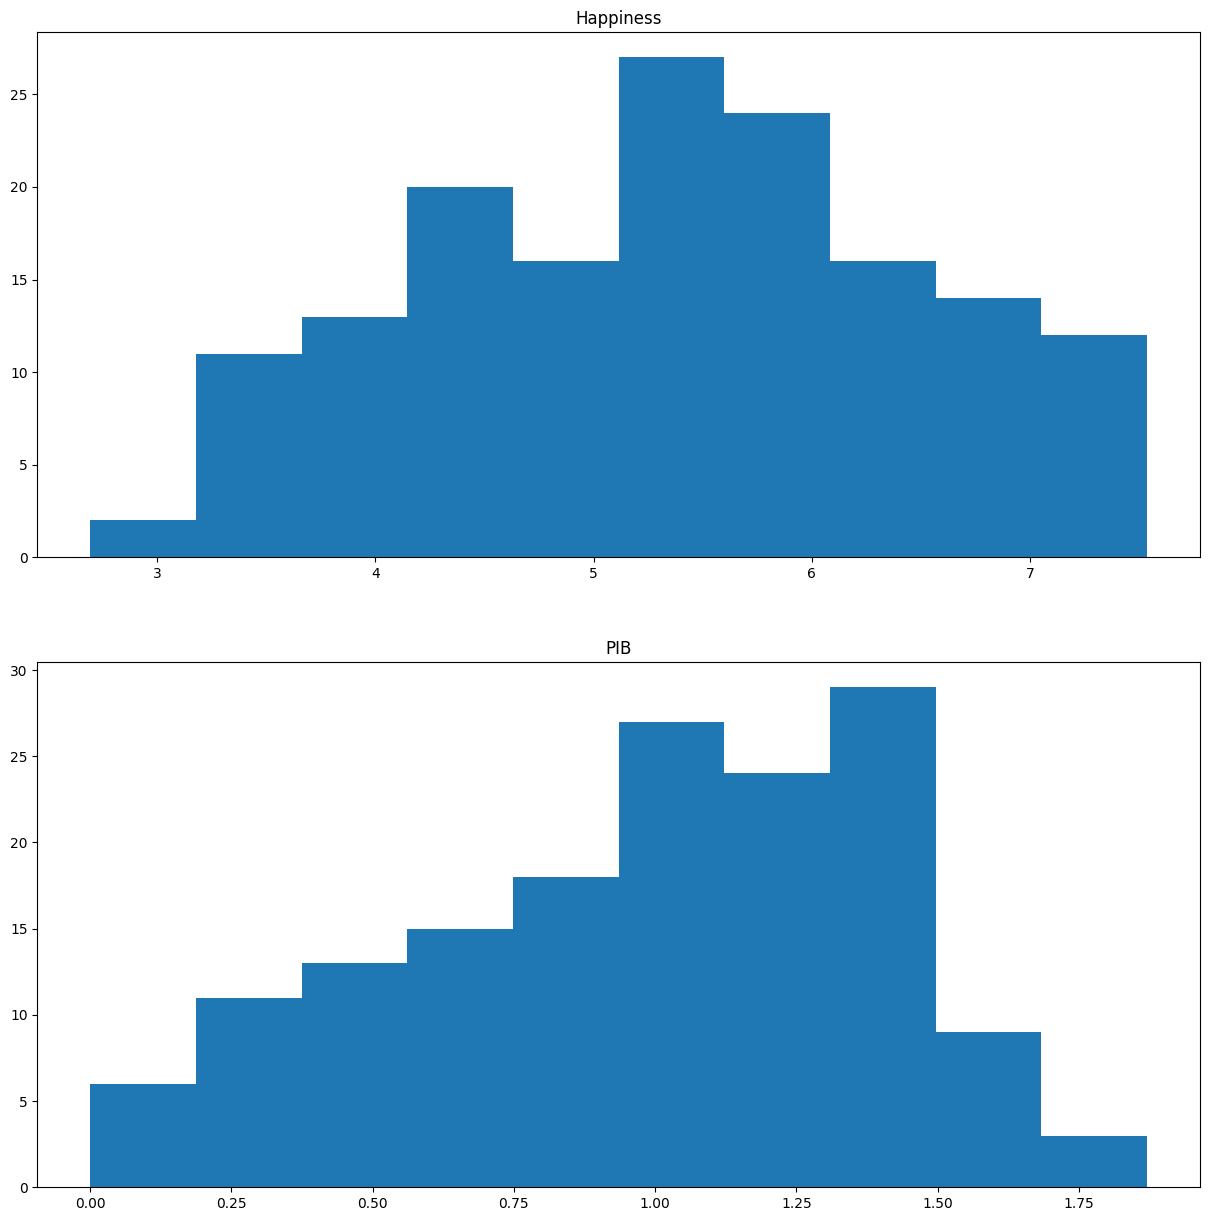

In [63]:
plotDataDistribution(world_happiness)

<h3>Plot</h3>

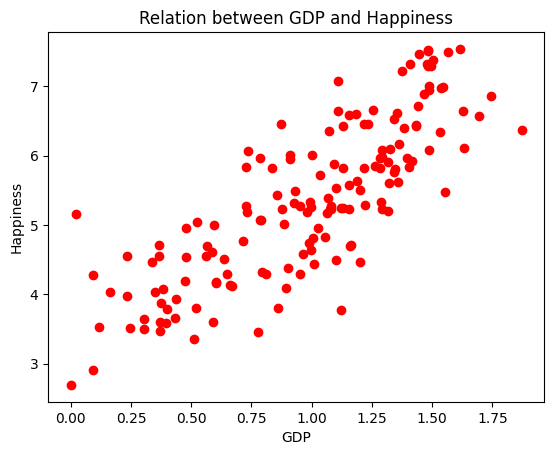

In [64]:
plotData(world_happiness)

<h3>Impartim setul de date intre set de antrenament si set de testare</h3>

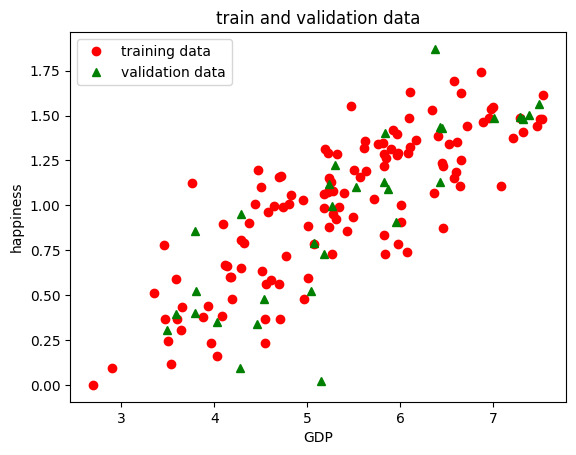

In [65]:
plotTrainingAndValidationDatas(world_happiness)

In [66]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  -0.6402746818108355  +  0.3021056147855919  * x


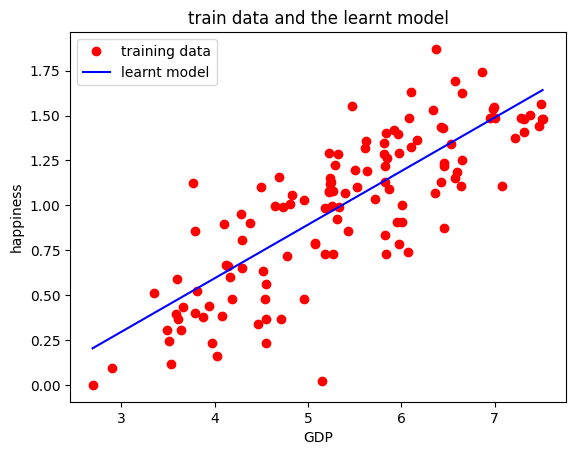

In [67]:
plotRegressor(world_happiness)

In [68]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.04808362050039208
Computed error: 0.048083620500392076


## Problema 2

In [69]:
world_happiness = readDatas("datas/v2_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

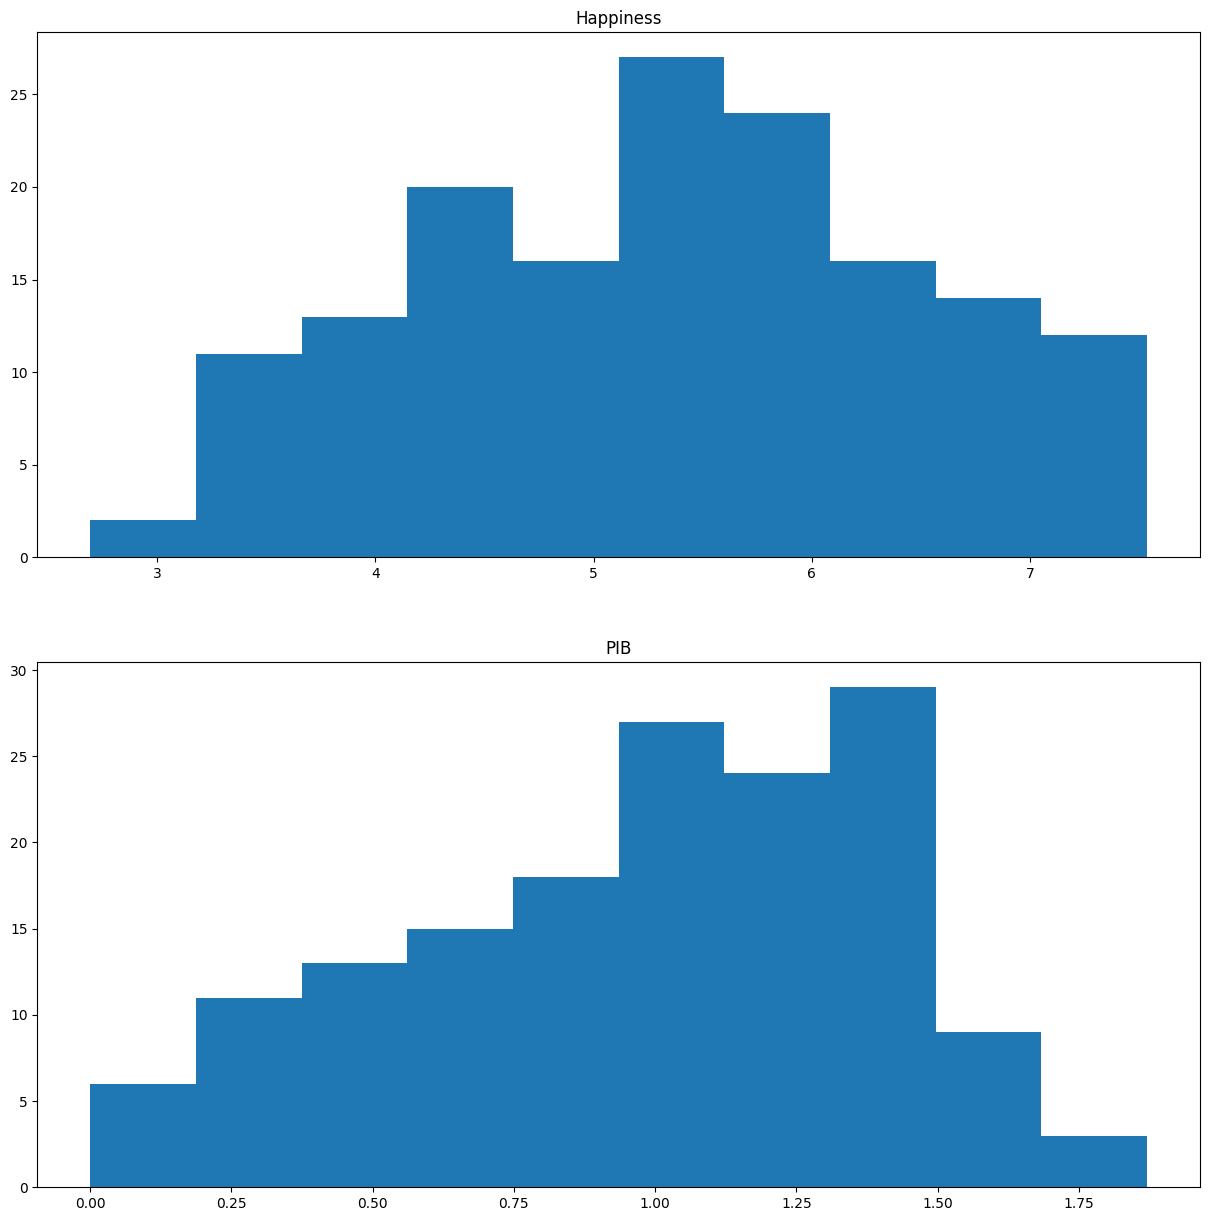

In [70]:
plotDataDistribution(world_happiness)

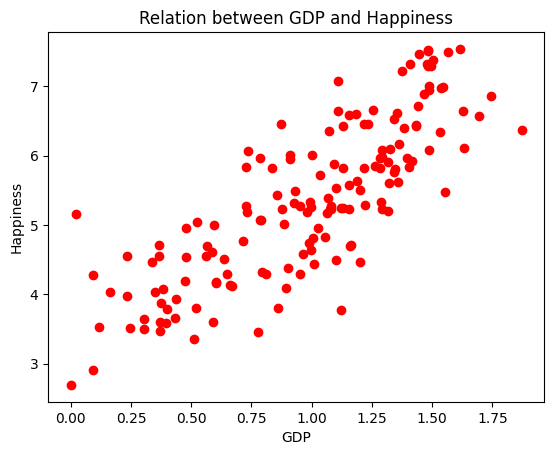

In [71]:
plotData(world_happiness)

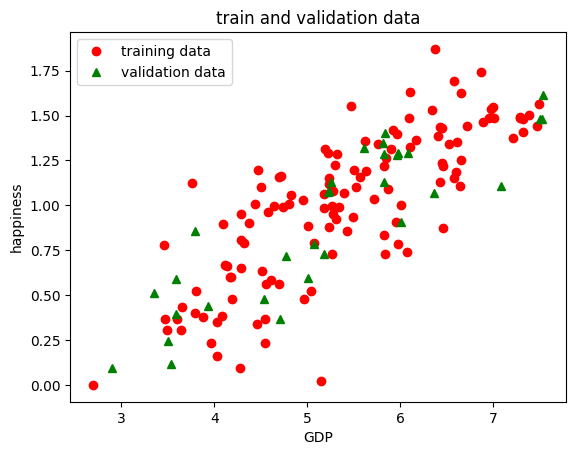

In [72]:
plotTrainingAndValidationDatas(world_happiness)

In [73]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  -0.6205097184136836  +  0.29884978034398757  * x


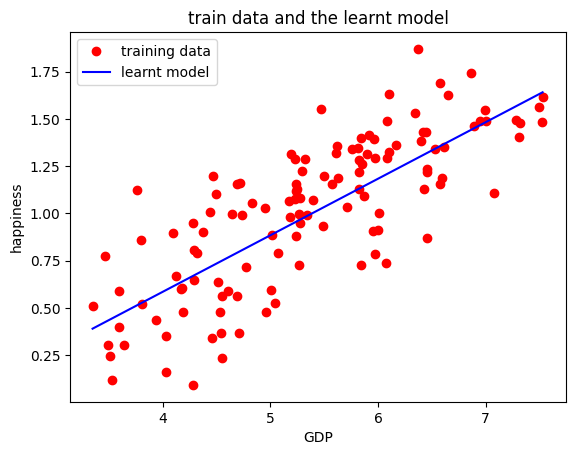

In [74]:
plotRegressor(world_happiness)

In [75]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.08046824031434512
Computed error: 0.08046824031434512


## Problema 3

In [76]:
world_happiness = readDatas("datas/v3_world-happiness-report-2017.csv")

world_happiness = world_happiness.dropna()

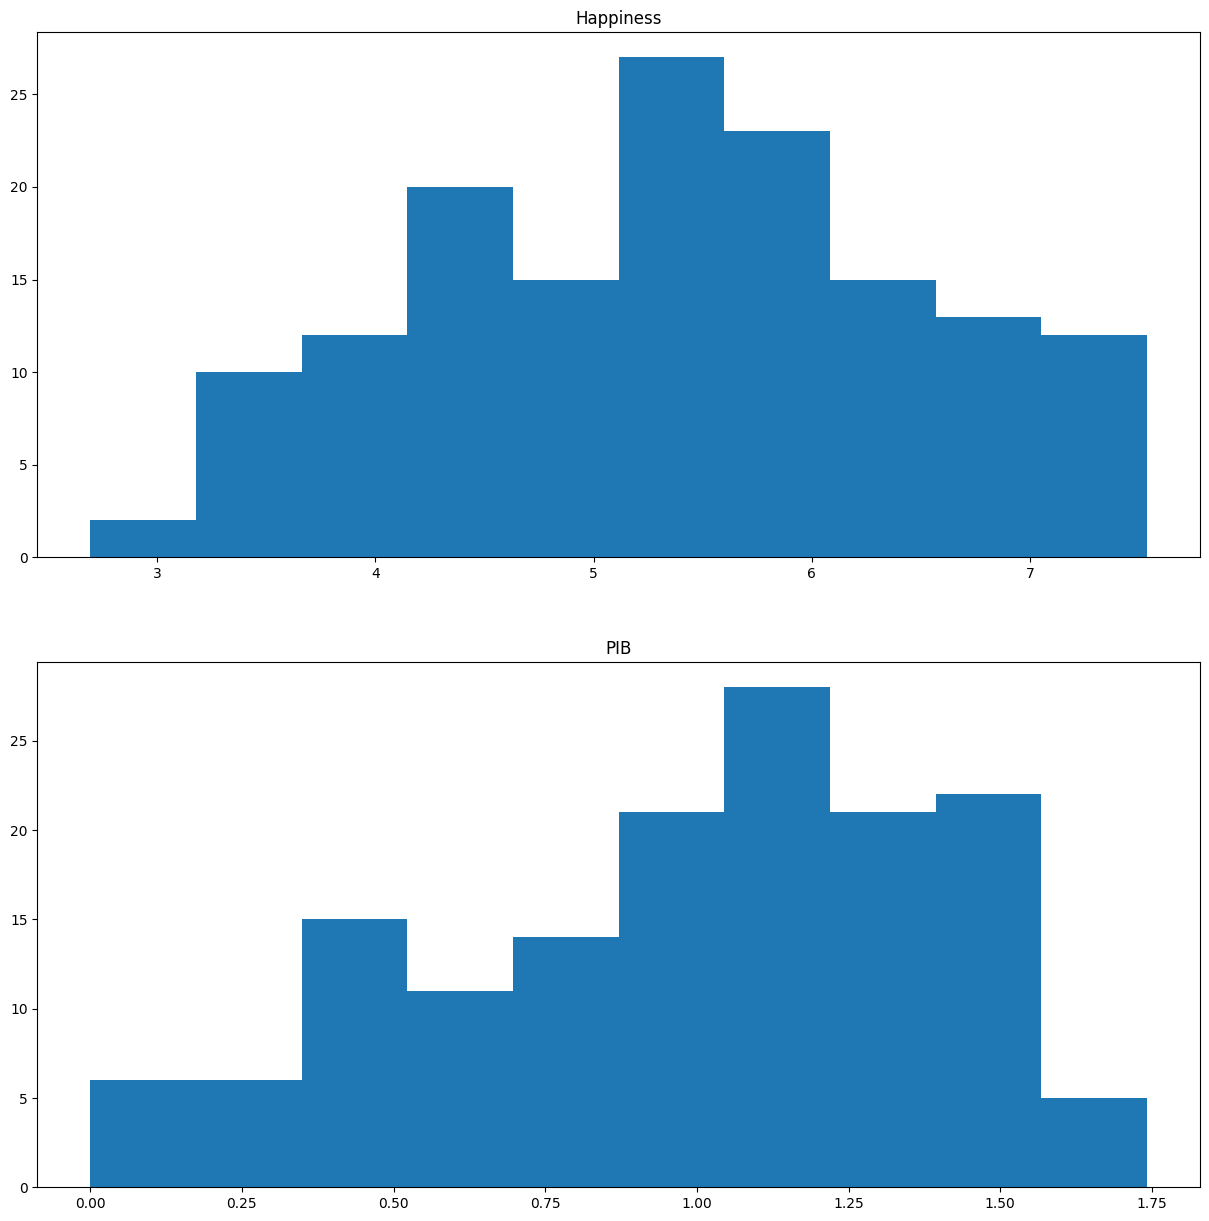

In [77]:
plotDataDistribution(world_happiness)

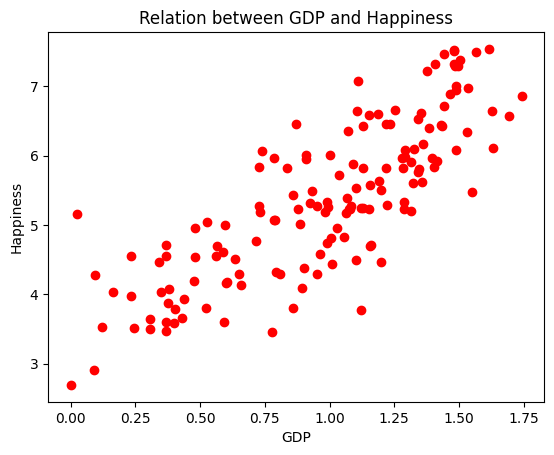

In [78]:
plotData(world_happiness)

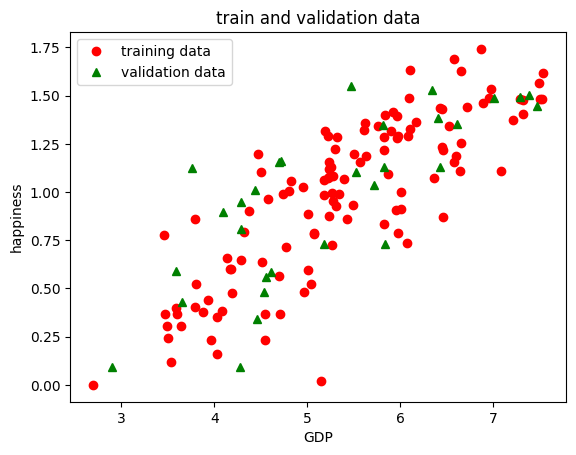

In [79]:
plotTrainingAndValidationDatas(world_happiness)

In [80]:
regressor = getRegressor(world_happiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  -0.6024546434387489  +  0.2939392959833176  * x


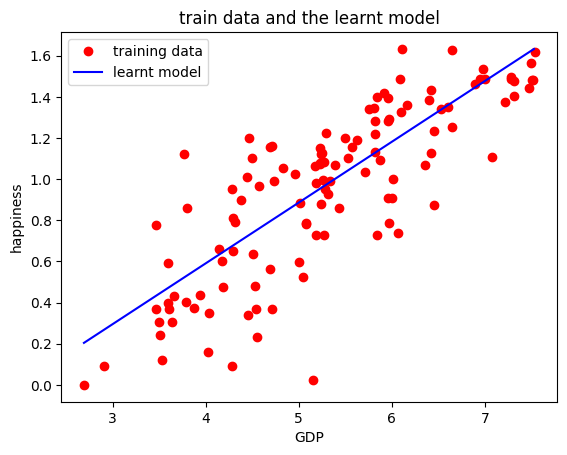

In [81]:
plotRegressor(world_happiness)

In [82]:
mErr, cErr = getErrors(world_happiness)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.03341682328405518
Computed error: 0.03341682328405518
